# Question 1

In [59]:
import numpy as np
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#########################################################
# Description: Simulate a channel using a digital Butterworth LPF with specified cutoff. This function
#              computes the output of the channel for the given input signal, and also adds AWGN of 
#              specified noise variance
#              
# Usage: y = channel(x,T,dt,fcut,nvar,figvar)
# Inputs: x - Input signal
#         T - Symbol duration  
#         dt - Sampling interval
#         fcut - For the digital Butterworth LPF, the 3-db cutoff is set to fcut*R/(.5 * fs), where R is the
#                symbol rate   
#         nvar - noise variance
#         figvar - If '1', the function will plot the frequency response of the filter, and the 
#                 input and ouput signals
# Output: y - Output signal y = h*x + n.
#########################################################

def channel(x,T,dt,fcut,nvar,figvar):
    fs = 1/dt 
    R = 1/T 
    Wn = fcut*R/(fs/2) 
    if Wn == 0 : 
        y = x + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    else : 
        b, a = signal.butter(5, Wn) 
        y = signal.lfilter(b, a, x) + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    if figvar == 1 : 
        f = np.arange(0,fs/2,dt) 
        w, Hf = signal.freqz(b,a,f.size)
        plt.figure()
        plt.plot(f,np.abs(Hf))
        plt.title('Frequency Response')
        plt.grid()
        plt.figure()
        plt.title('Sampled Original and Noisy Signal')
        plt.plot(x,'-')
        plt.plot(y,'--')
        plt.grid()
    return y 


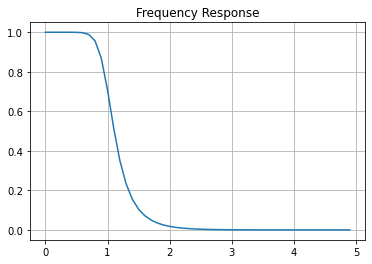

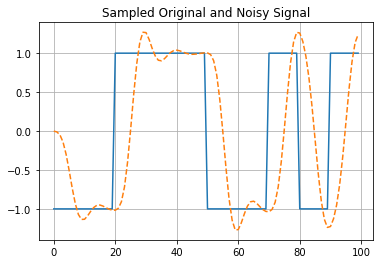

In [60]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=1
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

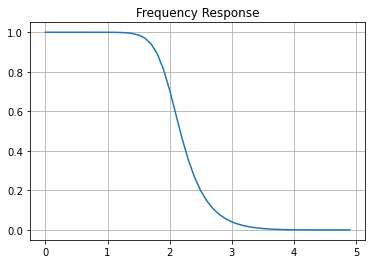

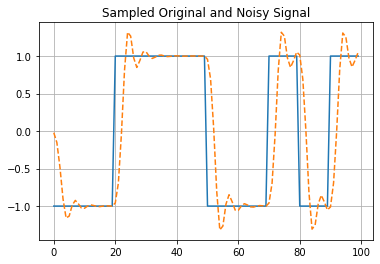

In [61]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=2
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

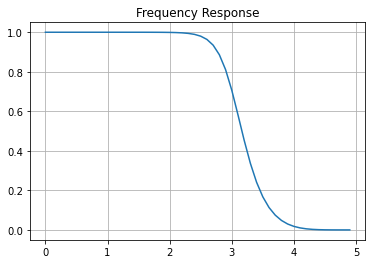

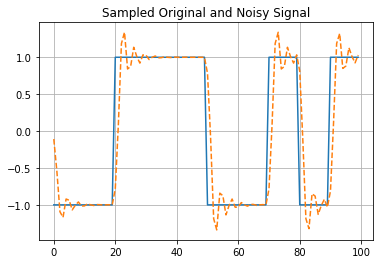

In [62]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=3
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

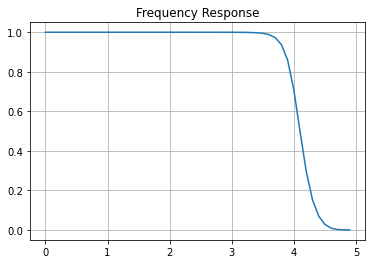

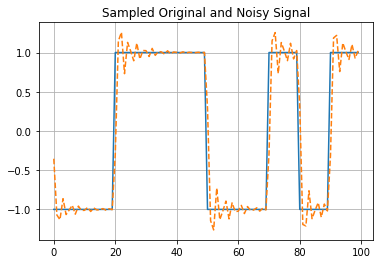

In [63]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=4
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

# Question 2 and 3

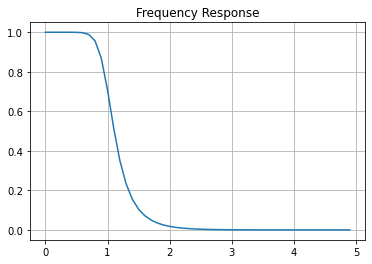

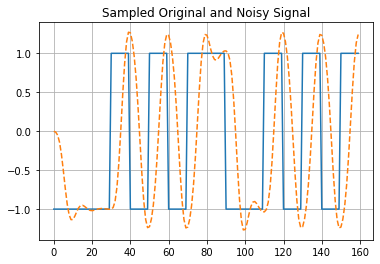

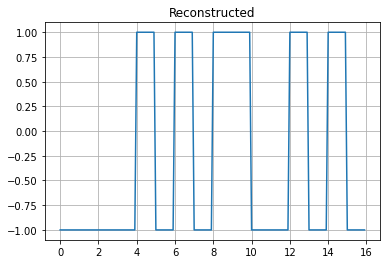

% of bits interpreted incorrectly: 68.75


In [71]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=1
nvar = 0
x = (2*np.random.randint(2, size=n) -1) * A
samples = 10
p = np.kron(x,np.ones(samples))
x_axis = np.arange(0,n,dt/T)
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

#Matched Filter
h = np.full((int(T/dt)), 2*A)

#Recovered Signal
received_signal = np.convolve(h,y)

th = 0
count=0
recovered_sig = np.empty([n, int(T/dt)])
for i in range(n):
    if(received_signal[int((i*samples) + (n/2))]>th):
        curr = A
    else:
        curr = -A
    if(abs(curr - x[i]) > 0.00001):
        count=count+1;
    row = np.full((1, int(T/dt)), curr)
    recovered_sig[i] = row;
recovered_sig = np.reshape(recovered_sig,(n*int(T/dt)))

plt.figure()
plt.grid()
plt.plot(x_axis,recovered_sig)
plt.title('Reconstructed')
plt.show()

print('% of bits interpreted incorrectly:',count*100/n)

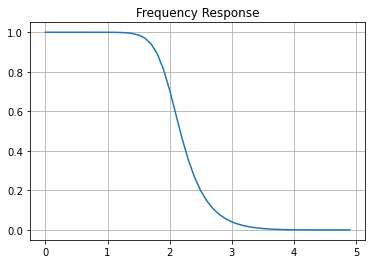

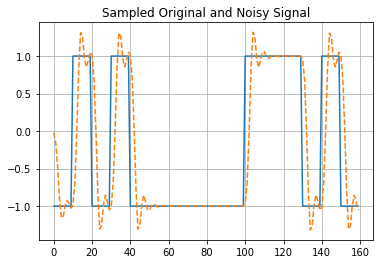

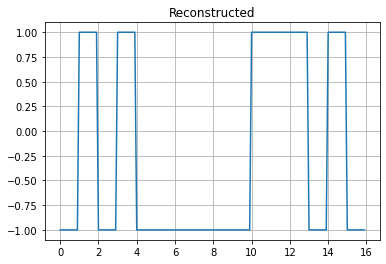

% of bits interpreted incorrectly: 0.0


In [72]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=2
nvar = 0
x = (2*np.random.randint(2, size=n) -1) * A
samples = 10
p = np.kron(x,np.ones(samples))
x_axis = np.arange(0,n,dt/T)
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

#Matched Filter
h = np.full((int(T/dt)), 2*A)

#Recovered Signal
received_signal = np.convolve(h,y)

th = 0
count=0
recovered_sig = np.empty([n, int(T/dt)])
for i in range(n):
    if(received_signal[int((i*samples) + (n/2))]>th):
        curr = A
    else:
        curr = -A
    if(abs(curr - x[i]) > 0.00001):
        count=count+1;
    row = np.full((1, int(T/dt)), curr)
    recovered_sig[i] = row;
recovered_sig = np.reshape(recovered_sig,(n*int(T/dt)))

plt.figure()
plt.grid()
plt.plot(x_axis,recovered_sig)
plt.title('Reconstructed')
plt.show()

print('% of bits interpreted incorrectly:',count*100/n)

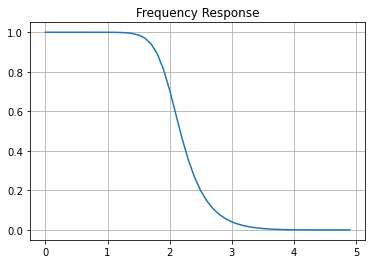

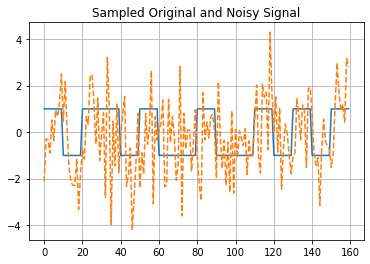

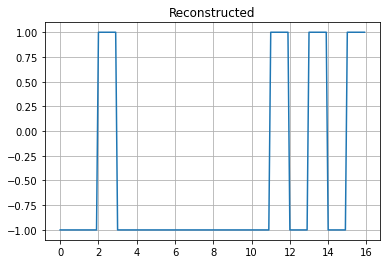

% of bits interpreted incorrectly: 25.0


In [73]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=2
nvar = 2
x = (2*np.random.randint(2, size=n) -1) * A
samples = 10
p = np.kron(x,np.ones(samples))
x_axis = np.arange(0,n,dt/T)
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

#Matched Filter
h = np.full((int(T/dt)), 2*A)

#Recovered Signal
received_signal = np.convolve(h,y)

th = 0
count=0
recovered_sig = np.empty([n, int(T/dt)])
for i in range(n):
    if(received_signal[int((i*samples) + (n/2))]>th):
        curr = A
    else:
        curr = -A
    if(abs(curr - x[i]) > 0.00001):
        count=count+1;
    row = np.full((1, int(T/dt)), curr)
    recovered_sig[i] = row;
recovered_sig = np.reshape(recovered_sig,(n*int(T/dt)))

plt.figure()
plt.grid()
plt.plot(x_axis,recovered_sig)
plt.title('Reconstructed')
plt.show()

print('% of bits interpreted incorrectly:',count*100/n)

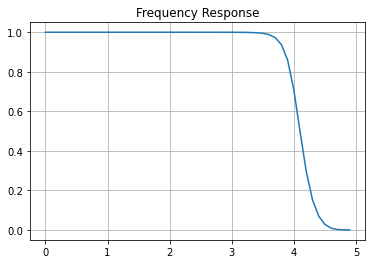

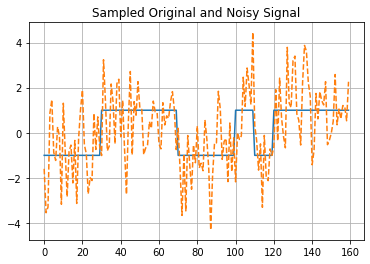

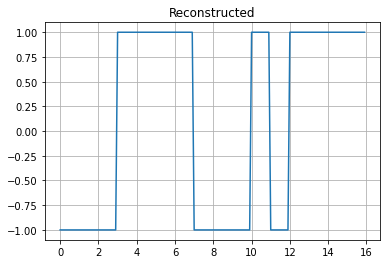

% of bits interpreted incorrectly: 0.0


In [74]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=4
nvar = 2
x = (2*np.random.randint(2, size=n) -1) * A
samples = 10
p = np.kron(x,np.ones(samples))
x_axis = np.arange(0,n,dt/T)
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

#Matched Filter
h = np.full((int(T/dt)), 2*A)

#Recovered Signal
received_signal = np.convolve(h,y)

th = 0
count=0
recovered_sig = np.empty([n, int(T/dt)])
for i in range(n):
    if(received_signal[int((i*samples) + (n/2))]>th):
        curr = A
    else:
        curr = -A
    if(abs(curr - x[i]) > 0.00001):
        count=count+1;
    row = np.full((1, int(T/dt)), curr)
    recovered_sig[i] = row;
recovered_sig = np.reshape(recovered_sig,(n*int(T/dt)))

plt.figure()
plt.grid()
plt.plot(x_axis,recovered_sig)
plt.title('Reconstructed')
plt.show()

print('% of bits interpreted incorrectly:',count*100/n)